In [1]:
import sys
sys.path.insert(1, '../') 

In [5]:
! pip install mip

In [6]:
import os
if not os.path.exists('./results'): 
    os.mkdir('./results')

In [14]:
from util import simulate_x
import numpy as np
import matplotlib.pyplot as plt
from optimal_sizes import optimal_column_weight, entropy
from membership_matrix import generate_doubly_regular_col
from test import test_M
import json 

In [15]:
num_trials = 1000

# Column Weights Analysis
In this notebook, we will investigate the effect of column weights on the performance of pooling matrices. 

In [16]:
T = 48
n = 384

fnr = 0
fpr = 0 

max_column_weight = 10
fs = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05] 

In [ ]:
# get average accuracy 
results = {} 
column_weights = list(range(1, max_column_weight + 1)) 

for f in fs: 
    
    # get average accuracy for different column weights 
    average_accuracy = []
    for column_weight in column_weights: 
        print("Starting column weight = %s ..." % column_weight)
        M = generate_doubly_regular_col((T, n), column_weight)
        info = test_M(M, f, n, fpr, fnr, num_trials=num_trials)
        average_accuracy.append(np.average(info["accuracy"]))
        
    results[f] = average_accuracy 
  
# save results 
with open("./results/column-weights-n%s-T%s.txt" % (n, T), 'w') as outfile:
    json.dump(results, outfile) 

On average, 2.31 positives in each trail.
Starting column weight = 1 ...
Finished trial 100
Starting column weight = 2 ...
Finished trial 100
Starting column weight = 3 ...
Finished trial 100
Starting column weight = 4 ...
Finished trial 100
Starting column weight = 5 ...
Finished trial 100
Starting column weight = 6 ...
Finished trial 100
Starting column weight = 7 ...
Finished trial 100
Starting column weight = 8 ...
Finished trial 100
Starting column weight = 9 ...
Finished trial 100
Starting column weight = 10 ...


theoretical optimal column weight for f = 1% is 10.
empirical optimal column weight for f = 1% is 4.
theoretical optimal column weight for f = 2% is 6.
empirical optimal column weight for f = 2% is 4.
theoretical optimal column weight for f = 3% is 4.
empirical optimal column weight for f = 3% is 4.
theoretical optimal column weight for f = 4% is 3.
empirical optimal column weight for f = 4% is 3.
theoretical optimal column weight for f = 5% is 2.
empirical optimal column weight for f = 5% is 8.
theoretical optimal column weight for f = 6% is 2.
empirical optimal column weight for f = 6% is 3.
theoretical optimal column weight for f = 7% is 2.
empirical optimal column weight for f = 7% is 9.
theoretical optimal column weight for f = 8% is 1.
empirical optimal column weight for f = 8% is 10.
theoretical optimal column weight for f = 9% is 1.
empirical optimal column weight for f = 9% is 10.
theoretical optimal column weight for f = 10% is 1.
empirical optimal column weight for f = 10% i

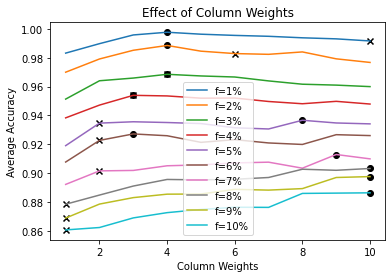

In [ ]:
# plot 
fig, ax = plt.subplots() 
for f in fs: 
    average_accuracy = results[f]
    
    empirical_index = average_accuracy.index(np.max(average_accuracy))
    empirical_m = column_weights[empirical_index]
    
    theoretical_m = optimal_column_weight(f, fnr, fpr, T, n) 
    
    if theoretical_m > max_column_weight:
        theoretical_m = max_column_weight
    
    theoretical_index = column_weights.index(theoretical_m) 

    print("theoretical optimal column weight for f = %.0f%% is %s." % ((f*100), theoretical_m))
    print("empirical optimal column weight for f = %.0f%% is %s." % ((f*100), empirical_m)) 
    print("=" * 20)  

    ax.plot(column_weights, average_accuracy, label="f=%.0f%%"%(f * 100))  

    ax.scatter(empirical_m, average_accuracy[empirical_index], marker='o', color='black')  
    ax.scatter(theoretical_m, average_accuracy[theoretical_index], marker='x', color='black')
    
ax.legend()
plt.xlabel("Column Weights") 
plt.ylabel("Average Accuracy")
plt.title("Effect of Column Weights")

plt.savefig("./results/column-weights-n%s-T%s.png" % (n, T))
plt.show()

Correlation for f=1: 0.64
Correlation for f=2: 0.83
Correlation for f=3: 0.87
Correlation for f=4: 0.30
Correlation for f=5: -0.17
Correlation for f=6: -0.28
Correlation for f=7: -0.79
Correlation for f=8: -0.94
Correlation for f=9: -0.92
Correlation for f=10: -0.95


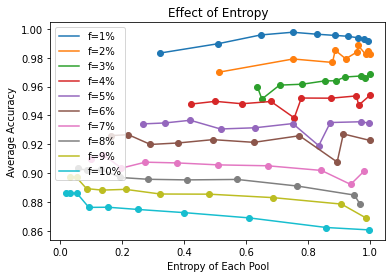

In [ ]:
# entropy plot 
fig, ax = plt.subplots() 
for f in fs: 
    average_accuracy = results[f]

    row_weights = [column_weight * n / T for column_weight in column_weights]
    entropies = [entropy(row_weight, f) for row_weight in row_weights]
    
    x, y = zip(*sorted(zip(entropies, average_accuracy)))
    ax.scatter(x, y)
    ax.plot(x, y, label="f=%.0f%%" % (f*100)) 
    print("Correlation for f=%.0f: %.2f" % ((f * 100), np.corrcoef(x, y)[0][1]))

ax.legend()
plt.xlabel("Entropy of Each Pool") 
plt.ylabel("Average Accuracy")
plt.title("Effect of Entropy")

plt.savefig("./results/entropy-n%s-T%s.png" % (n, T))
plt.show()